# TAREA I: Arboles de Decision
### Vladimir Abisai Espinosa Torrijos

Los arboles de decision se centran principalmente en encontrar umbrales. Para evitar el overfitting (error igual a 0) debemos "podar el arbol"
L-magica = treshold
El nodo raiz es el de menor entropia. Despues se busca la menor perdida de informacion para elegir el siguiente nodo (feature: nodo hoja).

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"C:\Users\vladi\OneDrive\Documentos\datas\iris.csv")

El Accuracy del modelo con un max_depth de 2 es de: 0.9777777777777777


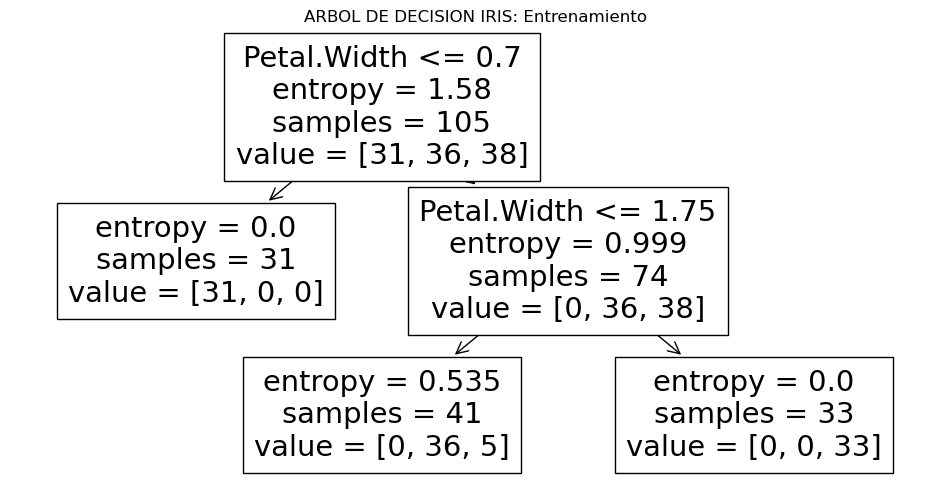

In [113]:
from sklearn.model_selection import train_test_split # PARA DIVIDIR LOS DATOS Y CLASES EN CONJUNTOS ENTRENAMIENTO/PRUEBA
from sklearn import tree # IMPORTAMOS LA FUNCION PARA LA CREACION DEL ARBOL

# DIVIDIMOS LOS DATOS EN LAS DIFERENTES VARIABLES PARA ENTRENAMIENTO/PRUEBA (utilice el 30% para test por que el Codigo Maquina lo hizo asi jajaj)
datos_entrenamiento, datos_prueba, clase_entrenamiento, clase_prueba = train_test_split(data[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']], data['Species'], test_size= 0.30) 

# AQUI YA HE CREADO EL ARBOL (ENTRENAMIENTO)
arbol_decision = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= 2)
arbol = arbol_decision.fit(datos_entrenamiento, clase_entrenamiento)

# ACCURACY
accuracy = arbol_decision.score(datos_prueba, clase_prueba)
print(f"El Accuracy del modelo con un max_depth de 2 es de: {accuracy}")

# LO PLOTEAMOS ASI BIEN CHIDO
plt.figure(figsize=(12,6))
tree.plot_tree(arbol, feature_names= ['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width'])
plt.title('ARBOL DE DECISION IRIS: Entrenamiento', )
plt.show()

El Accuracy del modelo con un max_depth de 2 es de: 0.9777777777777777


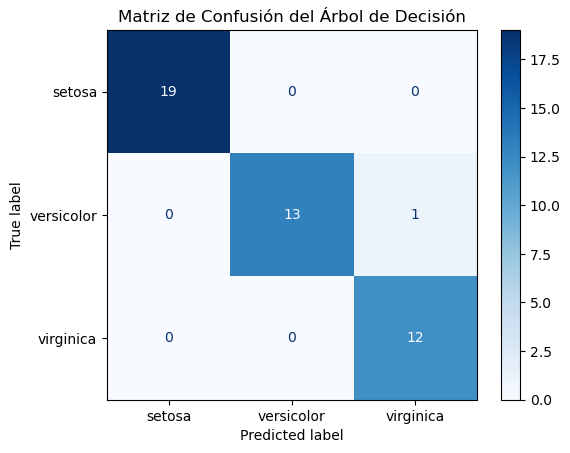

In [123]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# HACEMOS PREDICCIONES CON EL MODELO ENTRENADO
predicciones = arbol.predict(datos_prueba)

# GENERAMOS LA MATRIZ DE CONFUSIÓN
matriz_confusion = confusion_matrix(clase_prueba, predicciones, labels=arbol.classes_)
print(f"El Accuracy del modelo con un max_depth de 2 es de: {accuracy}")

# MOSTRAMOS LA MATRIZ DE CONFUSIÓN CON ETIQUETAS
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=arbol.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión del Árbol de Decisión")
plt.show()